In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


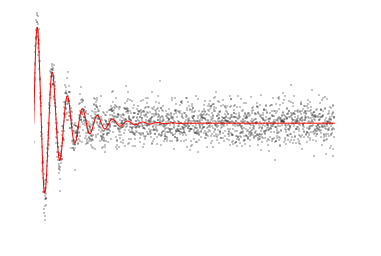

In [2]:
x = linspace(0,4*pi,2048)

def y(x):
    return sin(10*x)*exp(-x)

plot(x,y(x)+randn(x.size)/10,"k.",ms=1)
plot(x,y(x),"r")
axis("off");

What I plotted was $y = \sin(10 x) e^{-x}$

In [3]:
print(plt.style.available)

['ggplot', 'dark_background', 'fivethirtyeight', 'bmh', 'grayscale']


In [5]:
for style in plt.style.available:
    with plt.style.use(style):
        figure()
        plot(x,y(x))
        title(style)

AttributeError: __exit__

In [12]:
cmaps = {'Sequential': ['binary', 'Blues', 'BuGn', 'BuPu', 'gist_yarg',
                             'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
                             'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
                             'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd'],
         'Sequential2': ['afmhot', 'autumn', 'bone', 'cool', 'copper',
                             'gist_gray', 'gist_heat', 'gray', 'hot', 'pink',
                             'spring', 'summer', 'winter'],
         'Diverging':      ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
                             'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'seismic'],
         'Qualitative':    ['Accent', 'Dark2', 'hsv', 'Paired', 'Pastel1',
                             'Pastel2', 'Set1', 'Set2', 'Set3', 'spectral'],
         'Miscellaneous':  ['gist_earth', 'gist_ncar', 'gist_rainbow',
                             'gist_stern', 'jet', 'brg', 'CMRmap', 'cubehelix',
                             'gnuplot', 'gnuplot2', 'ocean', 'rainbow',
                             'terrain', 'flag', 'prism']}

In [17]:
cmaps['Sequential'][0]

'binary'

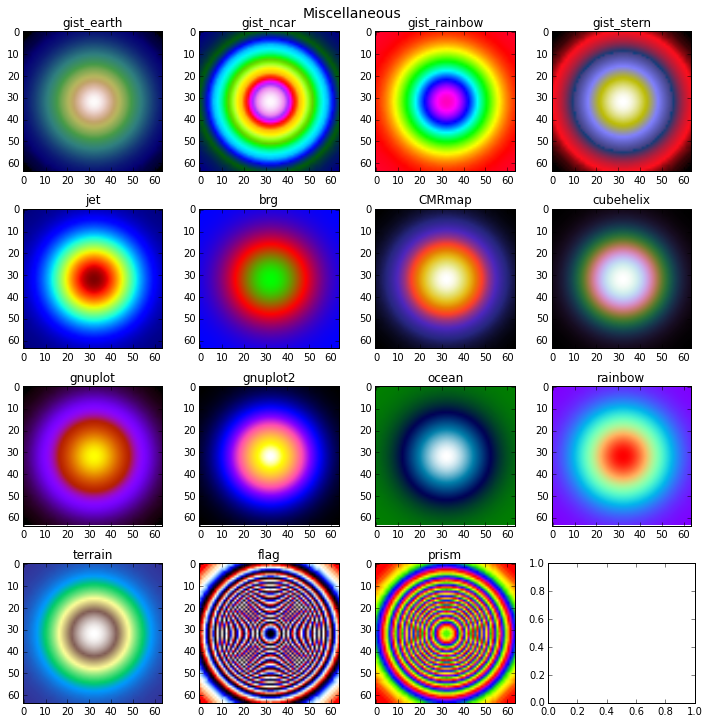

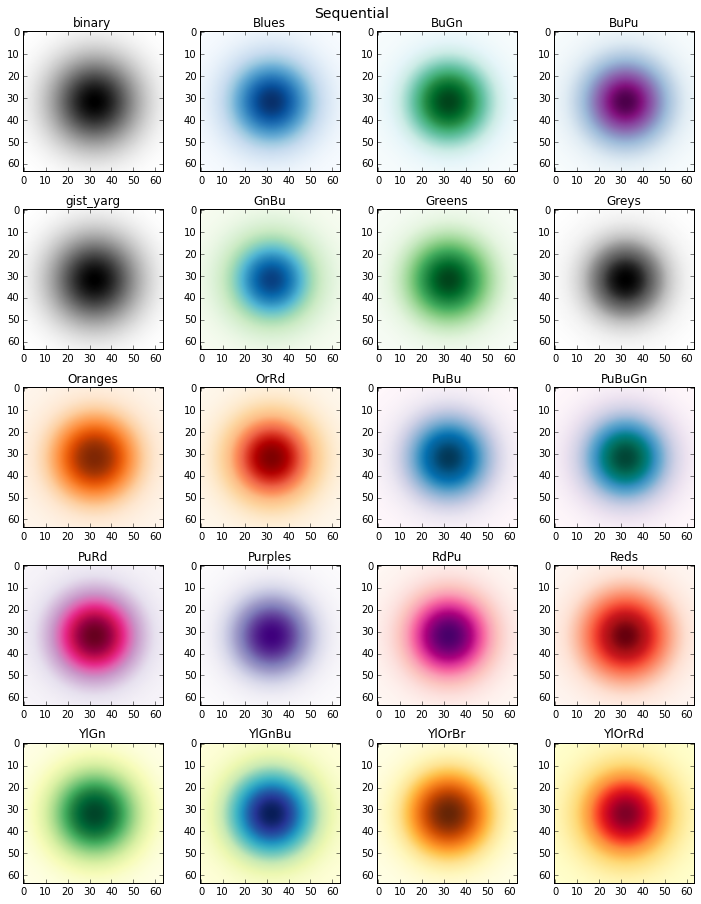

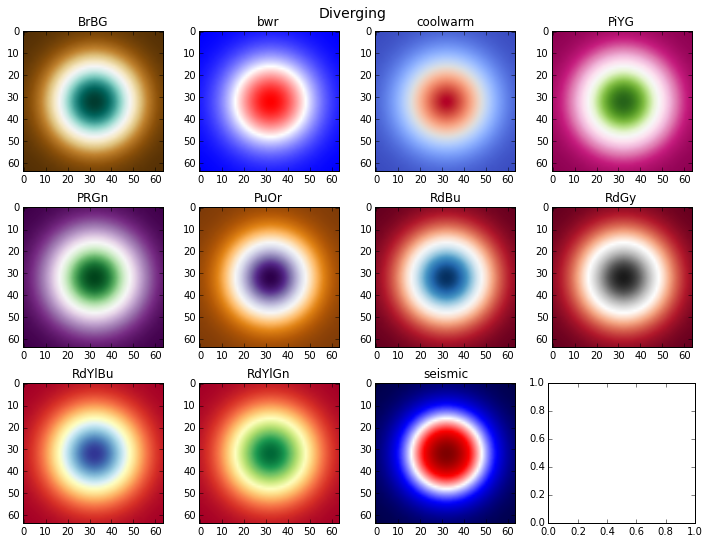

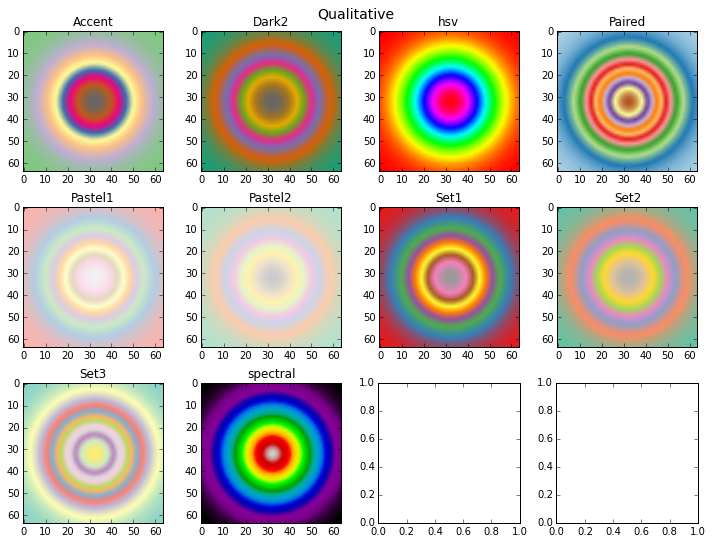

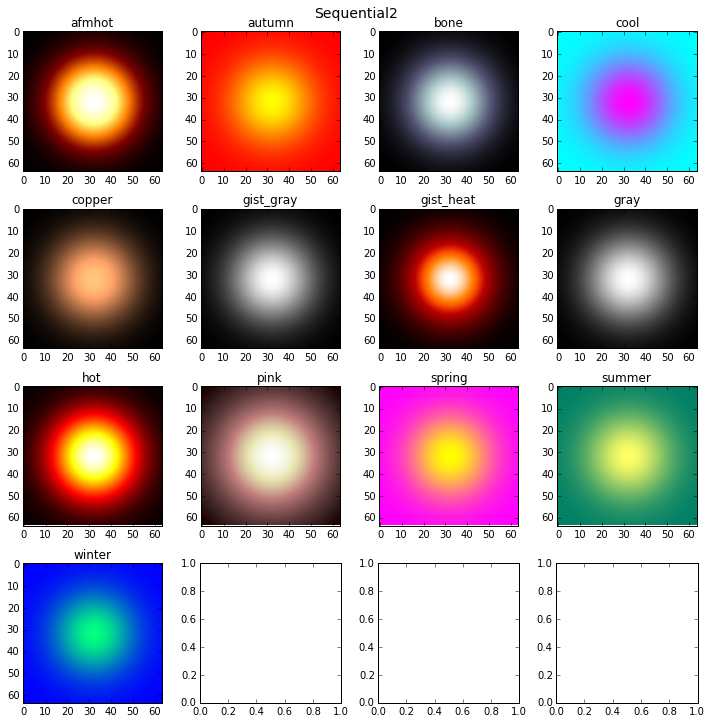

In [27]:
ran = rand(16,16)

num = 64
x=range(num)
xv, yv = meshgrid(x,x)
ran = 16**(-((xv-num/2)**2+(yv-num/2)**2)/(32**2))

#We want 4 columns of figures
num_cols = 4

for i, (cmapType, cmapList) in enumerate(cmaps.items()):
    #We need to choose the right number of rows to fit everything (remember to round up!)
    num_rows = int(ceil(len(cmapList)/num_cols))
    
    #set up our figure using subplots, we want it to be 10 inches across (figsize is in (width, height))
    mySize = 10*array([1,num_rows/num_cols])
    
    fig, ax = subplots(num_rows, num_cols, figsize = tuple(mySize))
    
    #go through all PSFs and add them to the subplots, use enumerate to get access to index
    for i, myCmap in enumerate(cmapList):
        #need to use unravel_index to index n x m array
        index = unravel_index(i, (num_rows, num_cols))
        
        #make a reference to the correct axis to use later on
        myAx = ax[index]
        
        #show the z max intensity projection
        myAx.imshow(ran, cmap = myCmap)
        
        #set the title
        myAx.set_title(myCmap)
    
    #set the title for the figure
    fig.suptitle(cmapType,y=1, fontsize = 14)
    
    #use tight_layout to make sure figures don't overlap
    fig.tight_layout()

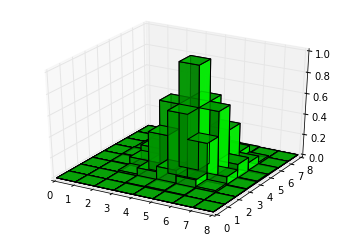

In [4]:
fig=figure()
ax = fig.add_subplot(111, projection='3d')
num = 8
x=range(num)
xv, yv = meshgrid(x,x)
test = exp(-((xv-4)**2+(yv-4)**2)/2)
dim = xv.ravel().size
ax.bar3d(xv.ravel(),yv.ravel(),zeros(dim),1,1,test.ravel(),color=[0,1,0,0.8])

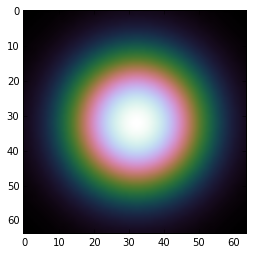

In [25]:
num = 64
x=range(num)
xv, yv = meshgrid(x,x)
test = 16**(-((xv-num/2)**2+(yv-num/2)**2)/(32**2))
imshow(test)#,interpolation='nearest')

In [25]:
array?

(0.0, 6.2831853071795862, 0.0, 6.2831853071795862)

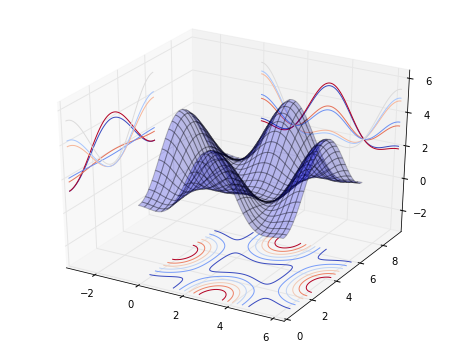

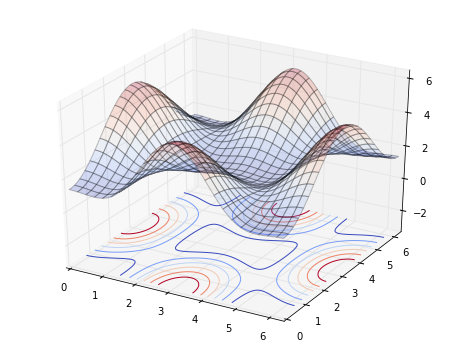

In [6]:
#example taken from
#http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb
alpha = 0.7
phi_ext = 2 * pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * cos(phi_p)*cos(phi_m) - alpha * cos(phi_ext - 2*phi_p)
phi_m = linspace(0, 2*pi, 100)
phi_p = linspace(0, 2*pi, 100)
X,Y = meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-pi, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-pi, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*pi, cmap=cm.coolwarm)

ax.set_xlim3d(-pi, 2*pi);
ax.set_ylim3d(0, 3*pi);
ax.set_zlim3d(-pi, 2*pi);

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='z', offset=-pi, cmap=cm.coolwarm)

ax.set_xlim3d(-pi, 2*pi);
ax.set_ylim3d(0, 3*pi);
ax.set_zlim3d(-pi, 2*pi);
ax.axis('tight')